In [309]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [310]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [311]:
# dataset is downloaded from the uic machine learning repository as per link given in the statement.
ds = pd.read_excel('estate.xlsx') #importing dataset and understanding some basic info about it.

In [312]:
ds.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [313]:
ds.drop('No',axis = 1, inplace = True)

In [314]:
ds.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [315]:
ds.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [316]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [317]:
yr = []
for i in ds['X1 transaction date']:
    yr.append(int(round(i,1)))

In [318]:
ds['X1 new'] = yr

In [319]:
ds.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 new
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012


In [320]:
ds.drop('X1 transaction date', axis = 1, inplace = True)

In [321]:
ds.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 new
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012


In [ ]:
#visualizing the features distribution.

(array([58., 43., 49., 97., 44., 10., 27., 50., 25., 11.]),
 array([ 0.  ,  4.38,  8.76, 13.14, 17.52, 21.9 , 26.28, 30.66, 35.04,
        39.42, 43.8 ]),
 <a list of 10 Patch objects>)

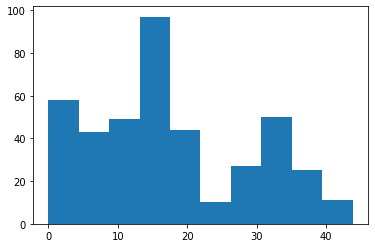

In [322]:
plt.hist(ds['X2 house age']) 

(array([251.,  42.,  47.,  30.,   7.,   3.,  27.,   2.,   2.,   3.]),
 array([  23.38284 ,  669.846656, 1316.310472, 1962.774288, 2609.238104,
        3255.70192 , 3902.165736, 4548.629552, 5195.093368, 5841.557184,
        6488.021   ]),
 <a list of 10 Patch objects>)

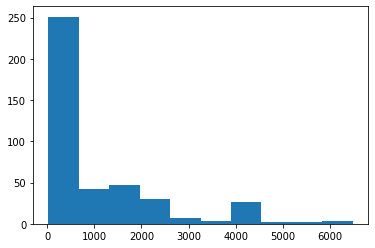

In [323]:
plt.hist(ds['X3 distance to the nearest MRT station'])

(array([  6.,  20.,  48.,  63.,  91., 125.,  53.,   6.,   1.,   1.]),
 array([24.93207 , 24.940322, 24.948574, 24.956826, 24.965078, 24.97333 ,
        24.981582, 24.989834, 24.998086, 25.006338, 25.01459 ]),
 <a list of 10 Patch objects>)

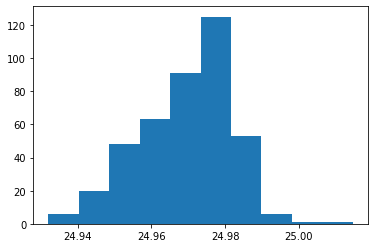

In [324]:
plt.hist(ds['X5 latitude'])

(array([  3.,   2.,  10.,  22.,  57.,  10., 101., 175.,  29.,   5.]),
 array([121.47353 , 121.482804, 121.492078, 121.501352, 121.510626,
        121.5199  , 121.529174, 121.538448, 121.547722, 121.556996,
        121.56627 ]),
 <a list of 10 Patch objects>)

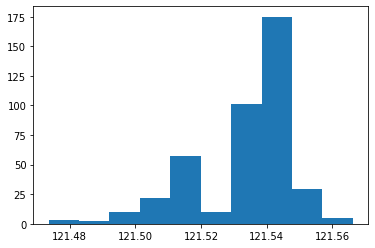

In [325]:
plt.hist(ds['X6 longitude'])

(array([67., 46., 24., 46., 31., 67., 37., 31., 30., 35.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

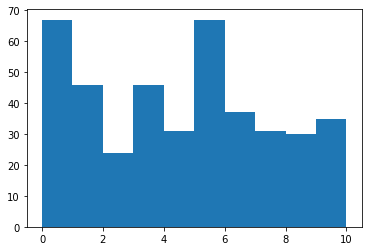

In [326]:
plt.hist(ds['X4 number of convenience stores'])

In [335]:
ds.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 new
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012


In [ ]:
#seperating dependent and independent features and splitting the data in training and testing part.

In [336]:
X = ds.drop('Y house price of unit area', axis = 1)
Y = ds['Y house price of unit area']

In [344]:
se  = StandardScaler()
X = se.fit_transform(X)

In [346]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [339]:
#y_train[7]

46.7

In [ ]:
#building the network and training.

In [381]:
def mod():
    
    model = Sequential()
    
    model.add(Dense(15, input_shape = [6], activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])
    return model

In [382]:
mymod = mod()

In [383]:
print(mymod.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 15)                105       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_78 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_79 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 11        
Total params: 496
Trainable params: 496
Non-trainable params: 0
_________________________________________________________________
None


In [384]:
history = mymod.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 150, batch_size = 32)

Train on 331 samples, validate on 83 samples
Epoch 1/150
331/331 [==============================] - 0s 1ms/step - loss: 1629.6486 - mse: 1629.6488 - val_loss: 1619.1107 - val_mse: 1619.1107
Epoch 2/150
331/331 [==============================] - 0s 259us/step - loss: 1625.6266 - mse: 1625.6265 - val_loss: 1614.3951 - val_mse: 1614.3951
Epoch 3/150
331/331 [==============================] - 0s 359us/step - loss: 1618.8919 - mse: 1618.8920 - val_loss: 1604.8645 - val_mse: 1604.8645
Epoch 4/150
331/331 [==============================] - 0s 365us/step - loss: 1607.0273 - mse: 1607.0273 - val_loss: 1589.8954 - val_mse: 1589.8954
Epoch 5/150
331/331 [==============================] - 0s 253us/step - loss: 1588.5447 - mse: 1588.5448 - val_loss: 1566.1005 - val_mse: 1566.1006
Epoch 6/150
331/331 [==============================] - 0s 292us/step - loss: 1561.7726 - mse: 1561.7725 - val_loss: 1531.3804 - val_mse: 1531.3804
Epoch 7/150
331/331 [==============================] - 0s 277us/step - loss

331/331 [==============================] - 0s 205us/step - loss: 64.4784 - mse: 64.4784 - val_loss: 39.7439 - val_mse: 39.7439
Epoch 59/150
331/331 [==============================] - 0s 196us/step - loss: 64.5123 - mse: 64.5123 - val_loss: 39.6083 - val_mse: 39.6083
Epoch 60/150
331/331 [==============================] - 0s 193us/step - loss: 64.1965 - mse: 64.1965 - val_loss: 39.1721 - val_mse: 39.1721
Epoch 61/150
331/331 [==============================] - 0s 196us/step - loss: 63.9487 - mse: 63.9487 - val_loss: 38.6900 - val_mse: 38.6900
Epoch 62/150
331/331 [==============================] - 0s 202us/step - loss: 63.8204 - mse: 63.8204 - val_loss: 38.7113 - val_mse: 38.7113
Epoch 63/150
331/331 [==============================] - 0s 196us/step - loss: 63.7231 - mse: 63.7231 - val_loss: 38.7409 - val_mse: 38.7409
Epoch 64/150
331/331 [==============================] - 0s 196us/step - loss: 63.5989 - mse: 63.5989 - val_loss: 38.5092 - val_mse: 38.5092
Epoch 65/150
331/331 [===========

331/331 [==============================] - 0s 205us/step - loss: 59.9361 - mse: 59.9361 - val_loss: 37.3980 - val_mse: 37.3980
Epoch 117/150
331/331 [==============================] - 0s 202us/step - loss: 59.9617 - mse: 59.9617 - val_loss: 36.9567 - val_mse: 36.9567
Epoch 118/150
331/331 [==============================] - 0s 202us/step - loss: 59.9525 - mse: 59.9525 - val_loss: 36.7367 - val_mse: 36.7367
Epoch 119/150
331/331 [==============================] - 0s 235us/step - loss: 59.9994 - mse: 59.9994 - val_loss: 36.9734 - val_mse: 36.9734
Epoch 120/150
331/331 [==============================] - 0s 253us/step - loss: 59.8037 - mse: 59.8037 - val_loss: 37.0385 - val_mse: 37.0385
Epoch 121/150
331/331 [==============================] - 0s 211us/step - loss: 59.8222 - mse: 59.8222 - val_loss: 36.9449 - val_mse: 36.9449
Epoch 122/150
331/331 [==============================] - 0s 218us/step - loss: 59.8331 - mse: 59.8331 - val_loss: 36.8085 - val_mse: 36.8085
Epoch 123/150
331/331 [====

In [385]:
y_hat = mymod.predict(x_test)

In [386]:
mean_squared_error(y_hat, y_test) #checking the error.

36.44066378896703

In [ ]:
#visualizing the results.

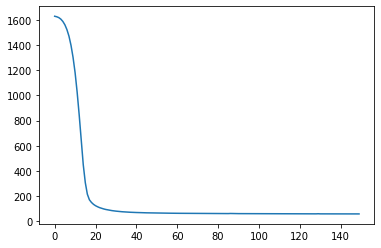

In [387]:
plt.plot(history.history['loss']) #error decereased linearly

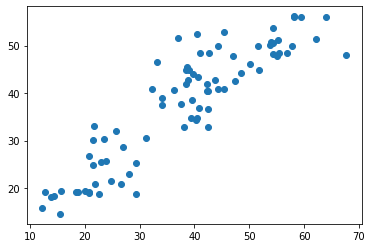

In [406]:
plt.scatter(y_test, y_hat)